# CatVsDog Hyper-parameter Experimentation
Developed by:
* Astrid Thalía Arteaga Romero A01420220
* Jorge Alexander Giovannetti Pulido A01283034

## 1 -  Packages
Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- load_dataset loads our dataset images into conveniently formatted numpy arrays.
- utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment with a couple tweaks for our experiments.
- np.random.seed(1) is used to keep all the random function calls consistent.

In [1]:
import numpy as np
from load_dataset import load_data
from utils import *

np.random.seed(1)

## 2 - Architecture of our model (L-layer Neural Network)

In [2]:
def L_layer_model(X, Y, layers_dims = [12288, 20, 7, 5, 1], learning_rate = 0.0075, num_iterations = 3000, activation_functions = ["relu", "relu", "relu", "relu", "sigmoid"], print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    activation_functions -- list containing the activation function for each layer.
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    assert len(layers_dims) == len(activation_functions)

    np.random.seed(1)
    costs = [] # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters, activation_functions)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches, activation_functions)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 3 - Checking our model
As a way of checking if our model is correct, we implement grad-checking to verify that our backward propagation works correctly in conjunction with our forward propagation.

In [5]:
def forward_prop_cost(X, parameters, Y, activation_functions):
    """
    Implements the forward propagation and computes the cost.
    
    Arguments
    ---------
    X : 2d-array
        input data, shape: number of features x number of examples.
    parameters : dict
        parameters to use in forward prop.
    Y : array
        true "label", shape: 1 x number of examples.
    hidden_layers_activation_fn : str
        activation function to be used on hidden layers: "tanh", "relu".

    Returns
    -------
    cost : float
        cross-entropy cost.
    """
    # Compute forward prop
    AL, _ = L_model_forward(X, parameters, activation_functions)

    # Compute cost
    cost = compute_cost(AL, Y)

    return cost

def gradient_check(parameters, gradients, X, Y, activation_functions, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing the generated parameters
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    activation_functions -- list containing the activation function for each layer.
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Roll out parameters and gradients dictionaries
    parameters_values = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)

    # Create vector of zeros to be used with epsilon
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))

    for i in range(len(parameters_values)):
        # Compute cost of theta + epsilon
        theta_plus = np.copy(parameters_values)
        theta_plus[i] = theta_plus[i] + epsilon
        j_plus = forward_prop_cost(X, vector_to_dictionary(theta_plus, layers_dims), Y, activation_functions)

        # Compute cost of theta - epsilon
        theta_minus = np.copy(parameters_values)
        theta_minus[i] = theta_minus[i] - epsilon
        j_minus = forward_prop_cost(X, vector_to_dictionary(theta_minus, layers_dims), Y, activation_functions)

        # Compute numerical gradients
        gradapprox[i] = (j_plus - j_minus) / (2 * epsilon)

    # Compute the difference of numerical and analytical gradients
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(gradapprox) + np.linalg.norm(grad)
    difference = numerator / denominator

    if difference > 10e-7:
        print ("\033[31mThere is a mistake in back-propagation " +\
               "implementation. The difference is: {}".format(difference))
    else:
        print ("\033[32mThere implementation of back-propagation is fine! ")

    return difference

In [6]:
layers_dims = [12288, 20, 7, 5, 1]
activation_functions = ["relu", "relu", "relu", "relu", "sigmoid"]
parameters = initialize_parameters_deep(layers_dims)

X = np.random.randint(255, size=(12288, 5))
Y = np.random.randint(0, 2, size=(1, 5))

AL, caches = L_model_forward(X, parameters, activation_functions)
cost = compute_cost(AL, Y)
grads = L_model_backward(AL, Y, caches, activation_functions)
difference = gradient_check(parameters, grads, X, Y, activation_functions)

There implementation of back-propagation is fine! The difference is: nan


## 4 - Dataset
The dataset we selected comes from Kaggle it is called "Dogs & Cats Images", there are 5000 pictures of cats and 5000 pictres of dogs.
A 1000 cat and dog images are set for dev, another 1000 cat and dog images are set for testing and 3000 cat and dog images are set for training.

LINK:https://www.kaggle.com/chetankv/dogs-cats-images

We'll use our dev_set for experimenting and when we reach our objective we'll train the model with the train set and, finally, test our results with the test set.

In [7]:
dev_x_orig, dev_y, classes = load_data('dev_set')
train_x_orig, train_y, classes = load_data('training_set')
test_x_orig, test_y, classes = load_data('test_set')

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 619.50it/s]


In [8]:
# Exploring our dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of train examples: " + str(m_train))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))

Number of train examples: 6000
Each image is of size: (64, 64, 3)
train_x_orig shape: (6000, 64, 64, 3)
train_y shape: (1, 6000)


In [9]:
# Reshape the training and test examples 
dev_x_flatten = dev_x_orig.reshape(dev_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
dev_x = dev_x_flatten/255.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("dev_x's shape: " + str(dev_x.shape))
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


dev_x's shape: (12288, 2000)
train_x's shape: (12288, 6000)
test_x's shape: (12288, 2000)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 5 - Hyper-parameters

We decided to experiment with the following hyper-parameters:
- Learning rate
- Number of iterations
- Number of layers
- Number of neurons in each layer
- The activation function in each layer

## Experiments

### Experiment #1: Default hyper-parameters
As a way of getting a baseline result for our experimentation process, we decided to use the same hyper-parameters we used in class for our first experiment.

Cost after iteration 0: 0.716532
Cost after iteration 100: 0.693150
Cost after iteration 200: 0.692789
Cost after iteration 300: 0.683020
Cost after iteration 400: 0.693306
Cost after iteration 500: 0.693253
Cost after iteration 600: 0.693253
Cost after iteration 700: 0.693253
Cost after iteration 800: 0.693253
Cost after iteration 900: 0.693253
Cost after iteration 1000: 0.693253
Cost after iteration 1100: 0.693253
Cost after iteration 1200: 0.693253
Cost after iteration 1300: 0.693253
Cost after iteration 1400: 0.693253
Cost after iteration 1500: 0.693253
Cost after iteration 1600: 0.693253
Cost after iteration 1700: 0.693253
Cost after iteration 1800: 0.693253
Cost after iteration 1900: 0.693253
Cost after iteration 2000: 0.693253
Cost after iteration 2100: 0.693253
Cost after iteration 2200: 0.693253
Cost after iteration 2300: 0.693253
Cost after iteration 2400: 0.693253


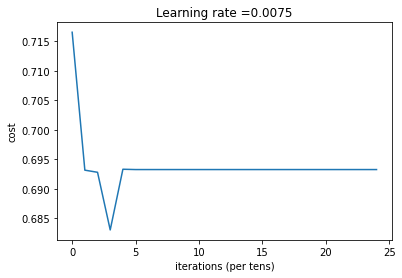

In [11]:
learning_rate = 0.0075
num_iterations = 2500
layers_dims = [12288, 20, 7, 5, 1]
activation_functions = ["relu", "relu", "relu", "relu", "sigmoid"]

parameters = L_layer_model(dev_x, dev_y, layers_dims, learning_rate, num_iterations, activation_functions, print_cost = True)

#### Analyzing experiment #1 results


##  6 - Final Performance Estimation
To evaluate the performance of our model as per the last experiment, we test the results with our test_set data.

In [ ]:
pred_train = predict(train_x, train_y, parameters, activation_functions)

In [ ]:
pred_test = predict(test_x, test_y, parameters, activation_functions)

In [ ]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

## Final Results